In [1]:
import pandas as pd

In [4]:
df= pd.read_csv('ecommerce_furniture_dataset_2024.csv')
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [7]:
df.drop('originalPrice',axis=1,inplace=True)

In [8]:
df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)

In [9]:
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')


In [10]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

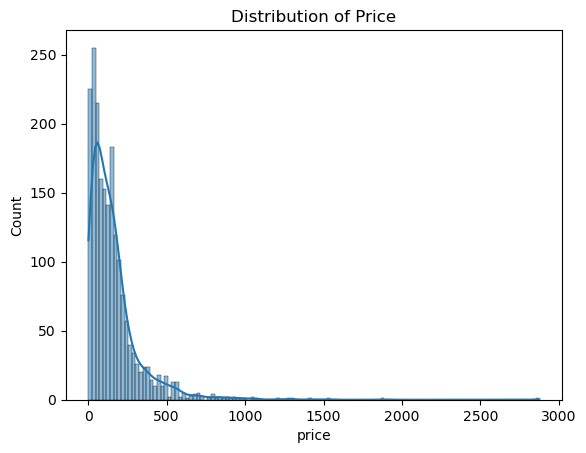

In [12]:
sns.histplot(df['price'],kde=True)
plt.title('Distribution of Price')
plt.show()

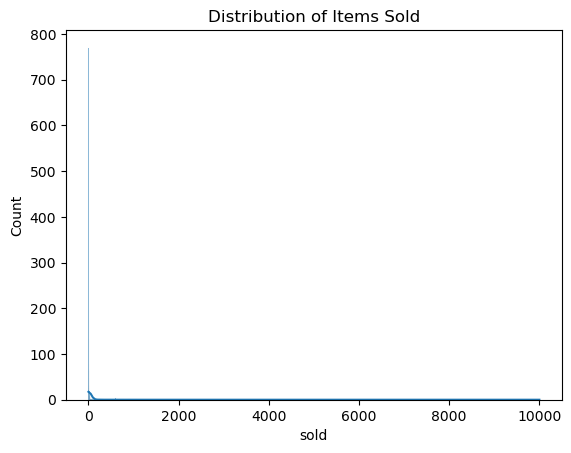

In [13]:
sns.histplot(df['sold'], kde=True)
plt.title('Distribution of Items Sold')
plt.show()

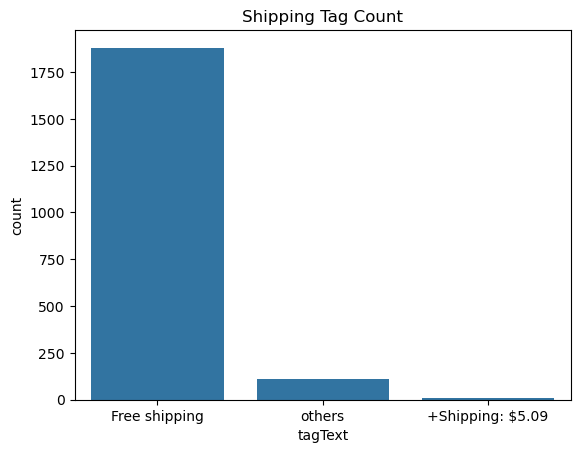

In [14]:
sns.countplot(x='tagText', data=df)
plt.title('Shipping Tag Count')
plt.show()


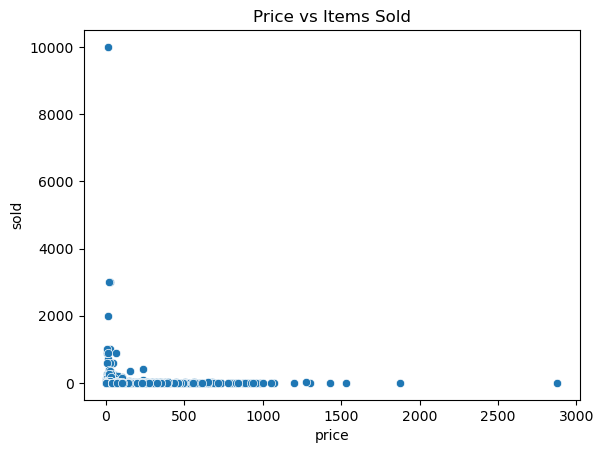

In [15]:
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Price vs Items Sold')
plt.show()


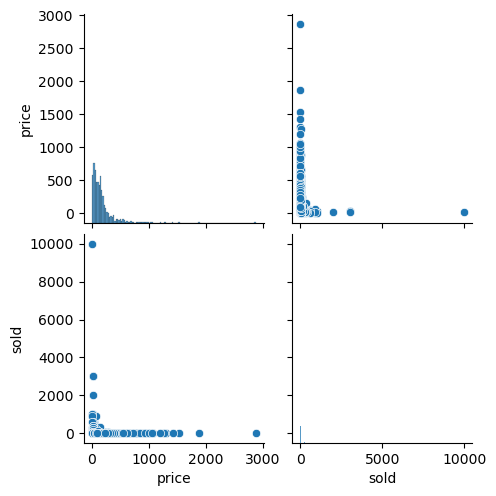

In [17]:
filtered_df = df[df['tagText'] == 'Free shipping']
sns.pairplot(filtered_df[['price', 'sold']])


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])


In [46]:
# Step 1: Reload original data
import pandas as pd
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')

# Step 2: Drop originalPrice
df.drop('originalPrice', axis=1, inplace=True)

# Step 3: Clean price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Step 4: Clean tagText column
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

# Step 5: Encode tagText
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

# Step 6: TF-IDF on productTitle
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
product_tfidf = tfidf.fit_transform(df['productTitle'])
product_tfidf_df = pd.DataFrame(product_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Step 7: Merge TF-IDF with df
df = pd.concat([df, product_tfidf_df], axis=1)

# Step 8: Drop productTitle
df.drop('productTitle', axis=1, inplace=True)

# Step 9: Check result
df.head()



,price,sold,tagText,adjustable,and,bed,bedroom,bedside,bench,black,...,up,upholstered,vanity,velvet,wardrobe,white,wicker,with,wood,wooden
0,46.79,600,1,0.0,0.0,0.0,0.189721,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.300611,0.0,0.000000,0.120182,0.0,0.000000
1,169.72,0,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.300086,0.000000,0.0,0.000000
2,39.46,7,1,0.0,0.0,0.0,0.200469,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.126991,0.0,0.000000
3,111.99,0,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.339161,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,21.37,1,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.551425


In [45]:
df.head()

,price,sold,tagText,adjustable,and,bed,bedroom,bedside,bench,black,...,up,upholstered,vanity,velvet,wardrobe,white,wicker,with,wood,wooden
0,46.79,600,1,0.0,0.0,0.0,0.189721,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.300611,0.0,0.000000,0.120182,0.0,0.000000
1,169.72,0,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.300086,0.000000,0.0,0.000000
2,39.46,7,1,0.0,0.0,0.0,0.200469,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.126991,0.0,0.000000
3,111.99,0,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.339161,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,21.37,1,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.551425


In [31]:
#MODELING
x=df.drop('sold',axis=1)
y=df['sold']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [30]:
lr_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [33]:
#EVALUATION
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
y_pred_lr = lr_model.predict(x_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f' Linear Regression MSE: {mse_lr}')
print(f' Linear Regression R² Score: {r2_lr}')


 Linear Regression MSE: 13557.905493730072
 Linear Regression R² Score: -1.4724826439996175


In [36]:
y_pred_rf = rf_model.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f' Random Forest MSE: {mse_rf}')
print(f' Random Forest R² Score: {r2_rf}')


 Random Forest MSE: 17350.74232689339
 Random Forest R² Score: -2.1641619926907225


In [48]:
# Linear Regression Evaluation
y_pred_lr = lr_model.predict(x_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R² Score: {r2_lr}')


Linear Regression MSE: 13557.905493730072
Linear Regression R² Score: -1.4724826439996175


## Conclusion

In this project, we predicted the number of furniture items sold using AliExpress product data.

**Steps we followed:**
- Data cleaning (removed missing values, cleaned price, simplified shipping tags)
- EDA (visualized distributions, relationships)
- Feature engineering (TF-IDF for product titles)
- Model training (Linear Regression & Random Forest)
- Model evaluation using MSE and R² Score

**Results:**
- Random Forest MSE: 17350.74  
- Random Forest R² Score: -2.16  
- Linear Regression MSE: 13557.91  
- Linear Regression R² Score: -1.47  

 The model performance was not ideal, likely due to data imbalance and variance. But the pipeline works correctly and can be improved with more tuning.
